# 테니스 지표 분석하기

# 라이브러리

In [3]:
# import library
import os ## 파일 가져오기 위해서
import pandas as pd ## 데이터 분석
import matplotlib.pyplot as plt ## 데이터 시각화를 위해

# 데이터 정보


데이터는 ATP 테니스 경기 데이터를 모아서 오픈 소스로 제공하는 https://github.com/JeffSackmann/tennis_atp에서 가져왔다. 
이 데이터는 각각의 경기를 자원봉사 받아서, 통계를 만들어서 github에 공유한 자료이다. (오픈 소스 가이드 라인 참조http://www.tennisabstract.com/blog/2015/09/23/the-match-charting-project-quick-start-guide/)

## 테니스 데이터 모음

페더러의 데뷔년도인 1998년부터 2021년까지의 데이터를 모아서 진행했다. 

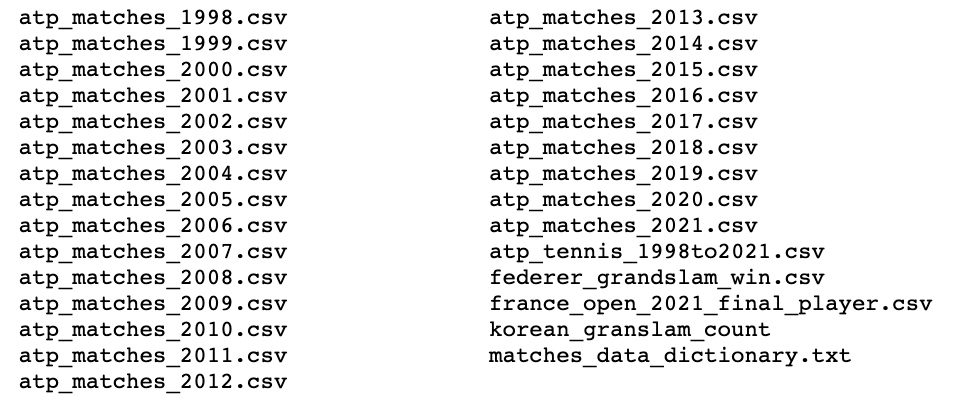


## 데이터 특성들 

* 데이터의 특성들
- 해당 대회, 
- tourney_level : 대회 레벨(G : 그랜드 슬램, M: 마스터즈 등등)
- tourney_date : 경기 날짜 
- winner_name, loser_name : 이긴선수, 진 선수 
- round : 진출 라운드(F: 결승 , SF: 준결승, QF: 8강, R16: 16강, R32: 32강, R64: 64강, R128: 128강)
등등



In [4]:
%ls

db.sqlite3
index.py
main/
manage.py*
tennis_atp/
tennis_data_analysis.ipynb
tennisapp/
테니스 데이터 분석.ipynb


In [5]:
%cd 수료후 테니스 프로젝트/
%ls

[Errno 2] No such file or directory: '수료후 테니스 프로젝트/'
/Users/ohsekwang/codestates/수료후 테니스 프로젝트/django(테니스웹어플)
db.sqlite3
index.py
main/
manage.py*
tennis_atp/
tennis_data_analysis.ipynb
tennisapp/
테니스 데이터 분석.ipynb


In [6]:
%cd tennis_atp
%ls

/Users/ohsekwang/codestates/수료후 테니스 프로젝트/django(테니스웹어플)/tennis_atp
README.md                        atp_matches_futures_2007.csv
atp_matches_1968.csv             atp_matches_futures_2008.csv
atp_matches_1969.csv             atp_matches_futures_2009.csv
atp_matches_1970.csv             atp_matches_futures_2010.csv
atp_matches_1971.csv             atp_matches_futures_2011.csv
atp_matches_1972.csv             atp_matches_futures_2012.csv
atp_matches_1973.csv             atp_matches_futures_2013.csv
atp_matches_1974.csv             atp_matches_futures_2014.csv
atp_matches_1975.csv             atp_matches_futures_2015.csv
atp_matches_1976.csv             atp_matches_futures_2016.csv
atp_matches_1977.csv             atp_matches_futures_2017.csv
atp_matches_1978.csv             atp_matches_futures_2018.csv
atp_matches_1979.csv             atp_matches_futures_2019.csv
atp_matches_1980.csv             atp_matches_futures_2020.csv
atp_matches_1981.csv             atp_matches_futures_2021

In [7]:
%cd matchdata

/Users/ohsekwang/codestates/수료후 테니스 프로젝트/django(테니스웹어플)/tennis_atp/matchdata


In [8]:
# 데이터의 특성에 대한 설명
tennis_dictionary = pd.read_table('matches_data_dictionary.txt')
tennis_dictionary

## 설명데이터 정리
tennis_dictionary.head(60)

##설명 없는 특성들 제거
tennis_dictionary = tennis_dictionary.drop([2,3,16,19,28,29,30,31,32,33,34,35,36,39,60,61,62,63,64,65,66,67,68])

tennis_dictionary

,"* Many of the columns in the 'matches' files are self-explanatory, or are very similar to previous columns."
0,tourney_id
1,"- a unique identifier for each tournament, suc..."
4,draw_size
5,"- number of players in the draw, often rounded..."
6,tourney_level
7,"- For men: 'G' = Grand Slams, 'M' = Masters 10..."
8,"- For women, there are several additional tour..."
9,"- Others, eventually for both genders: 'E' = e..."
10,tourney_date
11,"- eight digits, YYYYMMDD, usually the Monday o..."


# 테니스 데이터를 분석하기 위해서 필요한 파일 가져오기!

In [9]:
# 테니스 테이터를 모으고 활용할 수 있는 오픈소스 활용
## https://github.com/JeffSackmann/tennis_atp
## 1998~2021년까지의 데이터 가져오기

In [10]:
%ls

atp_tennis_1998to2021.csv          korean_granslam_count
federer_grandslam_win.csv          matches_data_dictionary.txt
france_open_2021_final_player.csv  페더러데뷔/


In [11]:
%cd 페더러데뷔

/Users/ohsekwang/codestates/수료후 테니스 프로젝트/django(테니스웹어플)/tennis_atp/matchdata/페더러데뷔


In [12]:
%ls

atp_matches_1998.csv  atp_matches_2006.csv  atp_matches_2014.csv
atp_matches_1999.csv  atp_matches_2007.csv  atp_matches_2015.csv
atp_matches_2000.csv  atp_matches_2008.csv  atp_matches_2016.csv
atp_matches_2001.csv  atp_matches_2009.csv  atp_matches_2017.csv
atp_matches_2002.csv  atp_matches_2010.csv  atp_matches_2018.csv
atp_matches_2003.csv  atp_matches_2011.csv  atp_matches_2019.csv
atp_matches_2004.csv  atp_matches_2012.csv  atp_matches_2020.csv
atp_matches_2005.csv  atp_matches_2013.csv  atp_matches_2021.csv


## 페더러 프로데뷔연도인 1998년부터  2021년까지 데이터 가져오기

In [13]:
%cd ..

/Users/ohsekwang/codestates/수료후 테니스 프로젝트/django(테니스웹어플)/tennis_atp/matchdata


In [14]:
# 데이터 한꺼번에 가져오기
## 폴더에 포함된 csv 파일을 file_list로 만든다.
path = './페더러데뷔'
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.csv')]

In [15]:
## 1998년부터 2021년까지 ATP 남자단식 통계 csv파일을 file_list로 만든다. 
file_list

['atp_matches_2019.csv',
 'atp_matches_2018.csv',
 '.DS_Store',
 'atp_matches_2020.csv',
 'atp_matches_2008.csv',
 'atp_matches_2009.csv',
 'atp_matches_2021.csv',
 'atp_matches_1999.csv',
 'atp_matches_1998.csv',
 'atp_matches_2010.csv',
 'atp_matches_2004.csv',
 'atp_matches_2005.csv',
 'atp_matches_2011.csv',
 'atp_matches_2007.csv',
 'atp_matches_2013.csv',
 'atp_matches_2012.csv',
 'atp_matches_2006.csv',
 'atp_matches_2002.csv',
 'atp_matches_2016.csv',
 'atp_matches_2017.csv',
 'atp_matches_2003.csv',
 'atp_matches_2015.csv',
 'atp_matches_2001.csv',
 'atp_matches_2000.csv',
 'atp_matches_2014.csv']

## 1998년부터 2021년 데이터까지 하나의 데이터 프레임

In [16]:
%cd matchdata
%ls

[Errno 2] No such file or directory: 'matchdata'
/Users/ohsekwang/codestates/수료후 테니스 프로젝트/django(테니스웹어플)/tennis_atp/matchdata
atp_tennis_1998to2021.csv          korean_granslam_count
federer_grandslam_win.csv          matches_data_dictionary.txt
france_open_2021_final_player.csv  페더러데뷔/


In [17]:
%cd 페더러데뷔

/Users/ohsekwang/codestates/수료후 테니스 프로젝트/django(테니스웹어플)/tennis_atp/matchdata/페더러데뷔


In [18]:
# file_list 파일을 하나의 데이터 프레임으로 만든다. 
df_tennis = pd.DataFrame()
for i in file_list_py:
    data = pd.read_csv(i) ## 각 csv 파일
    df_tennis = pd.concat([df_tennis, data]) ## 하나의 데이터 프레임을 붙이기


In [19]:
# 전체 데이터 프레임
df_tennis

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2019-M020,Brisbane,Hard,32,A,20181231,300,105453,2.0,NaN,...,54.0,34.0,20.0,14.0,10.0,15.0,9.0,3590.0,16.0,1977.0
1,2019-M020,Brisbane,Hard,32,A,20181231,299,106421,4.0,NaN,...,52.0,36.0,7.0,10.0,10.0,13.0,16.0,1977.0,239.0,200.0
2,2019-M020,Brisbane,Hard,32,A,20181231,298,105453,2.0,NaN,...,27.0,15.0,6.0,8.0,1.0,5.0,9.0,3590.0,40.0,1050.0
3,2019-M020,Brisbane,Hard,32,A,20181231,297,104542,NaN,PR,...,60.0,38.0,9.0,11.0,4.0,6.0,239.0,200.0,31.0,1298.0
4,2019-M020,Brisbane,Hard,32,A,20181231,296,106421,4.0,NaN,...,56.0,46.0,19.0,15.0,2.0,4.0,16.0,1977.0,18.0,1855.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2896,2014-605,Tour Finals,Hard,8,F,20141109,514,104925,1.0,NaN,...,38.0,29.0,5.0,11.0,3.0,9.0,1.0,10010.0,5.0,4625.0
2897,2014-605,Tour Finals,Hard,8,F,20141109,515,104925,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10010.0,2.0,8700.0
2898,2014-D015,Davis Cup WG F: FRA vs SUI,Clay,4,D,20141121,1,104527,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5295.0,12.0,2740.0
2899,2014-D015,Davis Cup WG F: FRA vs SUI,Clay,4,D,20141121,2,104792,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,19.0,1825.0,2.0,9700.0


## 연도별 경기가 얼마나 있는지 확인


In [20]:
df_tennis

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2019-M020,Brisbane,Hard,32,A,20181231,300,105453,2.0,NaN,...,54.0,34.0,20.0,14.0,10.0,15.0,9.0,3590.0,16.0,1977.0
1,2019-M020,Brisbane,Hard,32,A,20181231,299,106421,4.0,NaN,...,52.0,36.0,7.0,10.0,10.0,13.0,16.0,1977.0,239.0,200.0
2,2019-M020,Brisbane,Hard,32,A,20181231,298,105453,2.0,NaN,...,27.0,15.0,6.0,8.0,1.0,5.0,9.0,3590.0,40.0,1050.0
3,2019-M020,Brisbane,Hard,32,A,20181231,297,104542,NaN,PR,...,60.0,38.0,9.0,11.0,4.0,6.0,239.0,200.0,31.0,1298.0
4,2019-M020,Brisbane,Hard,32,A,20181231,296,106421,4.0,NaN,...,56.0,46.0,19.0,15.0,2.0,4.0,16.0,1977.0,18.0,1855.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2896,2014-605,Tour Finals,Hard,8,F,20141109,514,104925,1.0,NaN,...,38.0,29.0,5.0,11.0,3.0,9.0,1.0,10010.0,5.0,4625.0
2897,2014-605,Tour Finals,Hard,8,F,20141109,515,104925,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10010.0,2.0,8700.0
2898,2014-D015,Davis Cup WG F: FRA vs SUI,Clay,4,D,20141121,1,104527,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5295.0,12.0,2740.0
2899,2014-D015,Davis Cup WG F: FRA vs SUI,Clay,4,D,20141121,2,104792,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,19.0,1825.0,2.0,9700.0


In [21]:
## 연도데이터를 따로 뽑아내기 위해서 
df_tennis['tourney_date'] = pd.to_datetime(df_tennis['tourney_date'], format='%Y%m%d')

In [22]:
## 어느 연도의 매치가 많은지 파악
df_tennis['tourney_year'] = df_tennis['tourney_date'].dt.year
df_tennis['tourney_year']

0       2018
1       2018
2       2018
3       2018
4       2018
        ... 
2896    2014
2897    2014
2898    2014
2899    2014
2900    2014
Name: tourney_year, Length: 71178, dtype: int64

In [23]:
df_tennis['tourney_year'].value_counts()

1998    3591
2001    3400
2000    3378
1999    3334
2004    3288
2007    3285
2006    3267
2005    3263
2002    3213
2003    3125
2012    3095
2009    3085
2010    3030
2008    3030
2011    3015
2018    2974
2013    2944
2015    2943
2016    2941
2017    2886
2014    2816
2019    2696
2020    1462
2021    1117
Name: tourney_year, dtype: int64

In [24]:
## 데이터 파악
df_tennis

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,tourney_year
0,2019-M020,Brisbane,Hard,32,A,2018-12-31,300,105453,2.0,NaN,...,34.0,20.0,14.0,10.0,15.0,9.0,3590.0,16.0,1977.0,2018
1,2019-M020,Brisbane,Hard,32,A,2018-12-31,299,106421,4.0,NaN,...,36.0,7.0,10.0,10.0,13.0,16.0,1977.0,239.0,200.0,2018
2,2019-M020,Brisbane,Hard,32,A,2018-12-31,298,105453,2.0,NaN,...,15.0,6.0,8.0,1.0,5.0,9.0,3590.0,40.0,1050.0,2018
3,2019-M020,Brisbane,Hard,32,A,2018-12-31,297,104542,NaN,PR,...,38.0,9.0,11.0,4.0,6.0,239.0,200.0,31.0,1298.0,2018
4,2019-M020,Brisbane,Hard,32,A,2018-12-31,296,106421,4.0,NaN,...,46.0,19.0,15.0,2.0,4.0,16.0,1977.0,18.0,1855.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2896,2014-605,Tour Finals,Hard,8,F,2014-11-09,514,104925,1.0,NaN,...,29.0,5.0,11.0,3.0,9.0,1.0,10010.0,5.0,4625.0,2014
2897,2014-605,Tour Finals,Hard,8,F,2014-11-09,515,104925,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,10010.0,2.0,8700.0,2014
2898,2014-D015,Davis Cup WG F: FRA vs SUI,Clay,4,D,2014-11-21,1,104527,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,5295.0,12.0,2740.0,2014
2899,2014-D015,Davis Cup WG F: FRA vs SUI,Clay,4,D,2014-11-21,2,104792,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,19.0,1825.0,2.0,9700.0,2014


## 2021년 데이터가 어느 대회까지 정리되어 있는지 확인

In [25]:
%ls
df_tennis_2021 = pd.read_csv('atp_matches_2021.csv')
df_tennis_2021

atp_matches_1998.csv  atp_matches_2006.csv  atp_matches_2014.csv
atp_matches_1999.csv  atp_matches_2007.csv  atp_matches_2015.csv
atp_matches_2000.csv  atp_matches_2008.csv  atp_matches_2016.csv
atp_matches_2001.csv  atp_matches_2009.csv  atp_matches_2017.csv
atp_matches_2002.csv  atp_matches_2010.csv  atp_matches_2018.csv
atp_matches_2003.csv  atp_matches_2011.csv  atp_matches_2019.csv
atp_matches_2004.csv  atp_matches_2012.csv  atp_matches_2020.csv
atp_matches_2005.csv  atp_matches_2013.csv  atp_matches_2021.csv


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2021-0499,Delray Beach,Hard,32,A,20210104,300,128034,4.0,NaN,...,33.0,20.0,9.0,9.0,1.0,5.0,35,1518,119.0,566.0
1,2021-0499,Delray Beach,Hard,32,A,20210104,299,128034,4.0,NaN,...,46.0,29.0,13.0,11.0,3.0,5.0,35,1518,789.0,22.0
2,2021-0499,Delray Beach,Hard,32,A,20210104,298,200624,NaN,NaN,...,35.0,25.0,7.0,10.0,2.0,6.0,119,566,74.0,877.0
3,2021-0499,Delray Beach,Hard,32,A,20210104,297,106328,NaN,Q,...,45.0,34.0,18.0,11.0,9.0,11.0,789,22,101.0,733.0
4,2021-0499,Delray Beach,Hard,32,A,20210104,296,128034,4.0,NaN,...,43.0,28.0,10.0,10.0,7.0,10.0,35,1518,293.0,171.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,2021-7694,Lyon,Clay,32,A,20210517,276,200624,NaN,NaN,...,34.0,23.0,23.0,11.0,5.0,8.0,65,1027,84.0,897.0
1113,2021-7694,Lyon,Clay,32,A,20210517,275,105379,NaN,NaN,...,38.0,25.0,7.0,9.0,2.0,6.0,55,1141,68.0,995.0
1114,2021-7694,Lyon,Clay,32,A,20210517,273,104792,5.0,NaN,...,40.0,27.0,22.0,11.0,8.0,10.0,14,2703,122.0,644.0
1115,2021-7694,Lyon,Clay,32,A,20210517,272,106415,NaN,NaN,...,53.0,37.0,12.0,14.0,5.0,9.0,60,1084,33.0,1780.0


### 2021년 데이터는 롤랑가로스 전 ATP 리옹대회까지 정리되어 있음. 


# 데이터 살펴보기

## 98~2021년 동안 선수별 승리와 패배가 가장 많은 선수들 확인

### 승리가 가장 많은 선수

In [27]:
df_tennis['winner_name'].value_counts()

Roger Federer             1251
Rafael Nadal              1030
Novak Djokovic             962
David Ferrer               740
Andy Murray                686
                          ... 
Eddy Gonzalez Gonzalez       1
Lior Mor                     1
Kevin King                   1
Nick Van Rosberg             1
Matias Boeker                1
Name: winner_name, Length: 1673, dtype: int64

#### 빅4선수(페더러, 나달, 조코비치, 앤디 머레이)들이 top5안에 들어가는 걸 알 수 있다.

In [28]:
df_tennis['loser_name'].value_counts()

Feliciano Lopez          465
Fernando Verdasco        428
Mikhail Youzhny          423
Andreas Seppi            406
Philipp Kohlschreiber    389
                        ... 
Romain Bogaerts            1
Ilya Belyaev               1
Oscar Posada               1
Patrick Ciorcila           1
Sean Cooper                1
Name: loser_name, Length: 2465, dtype: int64

# 페더러의 주요성적지표

## ATP 전체 지표

### 승리 경기 수

In [29]:
# 페더러 기록 가져오기
df_federer_win = df_tennis[df_tennis['winner_name'] == 'Roger Federer']

## reindex해서 정렬
df_federer_win= df_federer_win.reset_index(drop=True) 
df_federer_win

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,tourney_year
0,2019-580,Australian Open,Hard,128,G,2019-01-14,187,103819,3.0,NaN,...,51.0,21.0,16.0,3.0,5.0,3.0,6420.0,189.0,266.0,2019
1,2019-580,Australian Open,Hard,128,G,2019-01-14,147,103819,3.0,NaN,...,45.0,16.0,14.0,6.0,9.0,3.0,6420.0,101.0,577.0,2019
2,2019-580,Australian Open,Hard,128,G,2019-01-14,207,103819,3.0,NaN,...,28.0,20.0,14.0,4.0,9.0,3.0,6420.0,50.0,964.0,2019
3,2019-0495,Dubai,Hard,32,A,2019-02-25,300,103819,2.0,NaN,...,26.0,9.0,10.0,0.0,2.0,7.0,4100.0,11.0,2965.0,2019
4,2019-0495,Dubai,Hard,32,A,2019-02-25,298,103819,2.0,NaN,...,20.0,9.0,8.0,5.0,9.0,7.0,4100.0,13.0,2605.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,2014-605,Tour Finals,Hard,8,F,2014-11-09,507,103819,2.0,NaN,...,19.0,11.0,8.0,4.0,7.0,2.0,8700.0,5.0,4625.0,2014
1247,2014-605,Tour Finals,Hard,8,F,2014-11-09,508,103819,2.0,NaN,...,7.0,9.0,6.0,1.0,6.0,2.0,8700.0,6.0,4475.0,2014
1248,2014-605,Tour Finals,Hard,8,F,2014-11-09,511,103819,2.0,NaN,...,22.0,15.0,9.0,4.0,6.0,2.0,8700.0,8.0,4440.0,2014
1249,2014-605,Tour Finals,Hard,8,F,2014-11-09,513,103819,2.0,NaN,...,38.0,36.0,17.0,6.0,9.0,2.0,8700.0,4.0,4895.0,2014


### 패배 경기수

In [32]:
## 진 경기수를 가져온다.
df_federer_lose = df_tennis[df_tennis['loser_name'] == 'Roger Federer']
df_federer_lose = df_federer_lose.reset_index(drop=True) ## index 정렬
df_federer_lose

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,tourney_year
0,2019-580,Australian Open,Hard,128,G,2019-01-14,217,126774,14.0,NaN,...,83.0,31.0,24.0,2.0,3.0,15.0,2095.0,3.0,6420.0,2019
1,2019-M006,Indian Wells Masters,Hard,128,M,2019-03-04,300,106233,7.0,NaN,...,42.0,12.0,15.0,1.0,4.0,8.0,3800.0,4.0,4600.0,2019
2,2019-M021,Madrid Masters,Clay,64,M,2019-05-06,296,106233,5.0,NaN,...,60.0,14.0,16.0,10.0,12.0,5.0,5085.0,3.0,5590.0,2019
3,2019-M009,Rome Masters,Clay,64,M,2019-05-13,295,126774,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,7.0,3790.0,3.0,5770.0,2019
4,2019-520,Roland Garros,Clay,128,G,2019-05-27,1602,104745,2.0,NaN,...,34.0,15.0,13.0,10.0,16.0,2.0,7945.0,3.0,5950.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,2014-421,Canada Masters,Hard,56,M,2014-08-04,55,104542,13.0,NaN,...,45.0,18.0,12.0,6.0,7.0,15.0,1910.0,3.0,6070.0,2014
273,2014-560,US Open,Hard,128,G,2014-08-25,126,105227,14.0,NaN,...,36.0,16.0,14.0,4.0,8.0,16.0,1845.0,3.0,7490.0,2014
274,2014-352,Paris Masters,Hard,48,M,2014-10-27,44,105683,7.0,NaN,...,38.0,14.0,12.0,1.0,2.0,10.0,3930.0,2.0,9280.0,2014
275,2014-605,Tour Finals,Hard,8,F,2014-11-09,515,104925,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,10010.0,2.0,8700.0,2014


### 전체경기 수 

In [34]:
## 이긴 경기와 진 경기를 합친다. 
df_federer_total = pd.concat([df_federer_lose, df_federer_win])
df_federer_total

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,tourney_year
0,2019-580,Australian Open,Hard,128,G,2019-01-14,217,126774,14.0,NaN,...,83.0,31.0,24.0,2.0,3.0,15.0,2095.0,3.0,6420.0,2019
1,2019-M006,Indian Wells Masters,Hard,128,M,2019-03-04,300,106233,7.0,NaN,...,42.0,12.0,15.0,1.0,4.0,8.0,3800.0,4.0,4600.0,2019
2,2019-M021,Madrid Masters,Clay,64,M,2019-05-06,296,106233,5.0,NaN,...,60.0,14.0,16.0,10.0,12.0,5.0,5085.0,3.0,5590.0,2019
3,2019-M009,Rome Masters,Clay,64,M,2019-05-13,295,126774,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,7.0,3790.0,3.0,5770.0,2019
4,2019-520,Roland Garros,Clay,128,G,2019-05-27,1602,104745,2.0,NaN,...,34.0,15.0,13.0,10.0,16.0,2.0,7945.0,3.0,5950.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,2014-605,Tour Finals,Hard,8,F,2014-11-09,507,103819,2.0,NaN,...,19.0,11.0,8.0,4.0,7.0,2.0,8700.0,5.0,4625.0,2014
1247,2014-605,Tour Finals,Hard,8,F,2014-11-09,508,103819,2.0,NaN,...,7.0,9.0,6.0,1.0,6.0,2.0,8700.0,6.0,4475.0,2014
1248,2014-605,Tour Finals,Hard,8,F,2014-11-09,511,103819,2.0,NaN,...,22.0,15.0,9.0,4.0,6.0,2.0,8700.0,8.0,4440.0,2014
1249,2014-605,Tour Finals,Hard,8,F,2014-11-09,513,103819,2.0,NaN,...,38.0,36.0,17.0,6.0,9.0,2.0,8700.0,4.0,4895.0,2014


### 승률

In [35]:
## 승률

total_num = len(df_federer_total) ## 전체 경기수
win_num = len(df_federer_win)  ## 이긴 경기수
lose_num = len(df_federer_lose) ## 진 경기수 

win_rate= win_num /total_num * 100 ## 승률
lose_rate= lose_num /total_num * 100 ## 패배율

## 승률/패배율 소수점 2자리 까지 정리
win_rate = round(win_rate,2) 
lose_rate = round(lose_rate,2)

### 전체경기수/승리수/패배수/승률/패배율

In [36]:
## 전체경기/승리/패배
print('전체 경기 : ',len(df_federer_total))
print('승리 :',len(df_federer_win))
print('패배 :',len(df_federer_lose))

## 소수자리수 정리

print('페더러 승률:', round(win_rate,2),'%')
print('페더러 패배율:', round(lose_rate,2),'%')

전체 경기 :  1528
승리 : 1251
패배 : 277
페더러 승률: 81.87 %
페더러 패배율: 18.13 %


## 코트별 주요 지표


### 하드코트

In [38]:
## 하드코트 전체 경기수
df_federer_hard = df_federer_total[df_federer_total['surface'] == 'Hard']
df_federer_hard


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,tourney_year
0,2019-580,Australian Open,Hard,128,G,2019-01-14,217,126774,14.0,NaN,...,83.0,31.0,24.0,2.0,3.0,15.0,2095.0,3.0,6420.0,2019
1,2019-M006,Indian Wells Masters,Hard,128,M,2019-03-04,300,106233,7.0,NaN,...,42.0,12.0,15.0,1.0,4.0,8.0,3800.0,4.0,4600.0,2019
6,2019-M024,Cincinnati Masters,Hard,64,M,2019-08-12,291,126094,NaN,Q,...,20.0,9.0,9.0,1.0,4.0,70.0,836.0,3.0,7460.0,2019
7,2019-560,US Open,Hard,128,G,2019-08-26,221,105777,NaN,NaN,...,65.0,28.0,23.0,10.0,15.0,78.0,722.0,3.0,6950.0,2019
8,2019-5014,Shanghai Masters,Hard,64,M,2019-10-07,294,100644,5.0,NaN,...,38.0,19.0,14.0,4.0,8.0,6.0,4185.0,3.0,7130.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,2014-352,Paris Masters,Hard,48,M,2014-10-27,40,103819,2.0,NaN,...,37.0,10.0,10.0,8.0,10.0,2.0,9280.0,176.0,290.0,2014
1246,2014-605,Tour Finals,Hard,8,F,2014-11-09,507,103819,2.0,NaN,...,19.0,11.0,8.0,4.0,7.0,2.0,8700.0,5.0,4625.0,2014
1247,2014-605,Tour Finals,Hard,8,F,2014-11-09,508,103819,2.0,NaN,...,7.0,9.0,6.0,1.0,6.0,2.0,8700.0,6.0,4475.0,2014
1248,2014-605,Tour Finals,Hard,8,F,2014-11-09,511,103819,2.0,NaN,...,22.0,15.0,9.0,4.0,6.0,2.0,8700.0,8.0,4440.0,2014


In [39]:
## 하드코트에서 이긴 수 
df_federer_hard_win = df_federer_hard[df_federer_hard['winner_name'] == 'Roger Federer']
df_federer_hard_win


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,tourney_year
0,2019-580,Australian Open,Hard,128,G,2019-01-14,187,103819,3.0,NaN,...,51.0,21.0,16.0,3.0,5.0,3.0,6420.0,189.0,266.0,2019
1,2019-580,Australian Open,Hard,128,G,2019-01-14,147,103819,3.0,NaN,...,45.0,16.0,14.0,6.0,9.0,3.0,6420.0,101.0,577.0,2019
2,2019-580,Australian Open,Hard,128,G,2019-01-14,207,103819,3.0,NaN,...,28.0,20.0,14.0,4.0,9.0,3.0,6420.0,50.0,964.0,2019
3,2019-0495,Dubai,Hard,32,A,2019-02-25,300,103819,2.0,NaN,...,26.0,9.0,10.0,0.0,2.0,7.0,4100.0,11.0,2965.0,2019
4,2019-0495,Dubai,Hard,32,A,2019-02-25,298,103819,2.0,NaN,...,20.0,9.0,8.0,5.0,9.0,7.0,4100.0,13.0,2605.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,2014-352,Paris Masters,Hard,48,M,2014-10-27,40,103819,2.0,NaN,...,37.0,10.0,10.0,8.0,10.0,2.0,9280.0,176.0,290.0,2014
1246,2014-605,Tour Finals,Hard,8,F,2014-11-09,507,103819,2.0,NaN,...,19.0,11.0,8.0,4.0,7.0,2.0,8700.0,5.0,4625.0,2014
1247,2014-605,Tour Finals,Hard,8,F,2014-11-09,508,103819,2.0,NaN,...,7.0,9.0,6.0,1.0,6.0,2.0,8700.0,6.0,4475.0,2014
1248,2014-605,Tour Finals,Hard,8,F,2014-11-09,511,103819,2.0,NaN,...,22.0,15.0,9.0,4.0,6.0,2.0,8700.0,8.0,4440.0,2014


In [40]:
## 하드코에서 진 경기수
df_federer_hard_lose = df_federer_hard[df_federer_hard['loser_name'] == 'Roger Federer']
df_federer_hard_lose

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,tourney_year
0,2019-580,Australian Open,Hard,128,G,2019-01-14,217,126774,14.0,NaN,...,83.0,31.0,24.0,2.0,3.0,15.0,2095.0,3.0,6420.0,2019
1,2019-M006,Indian Wells Masters,Hard,128,M,2019-03-04,300,106233,7.0,NaN,...,42.0,12.0,15.0,1.0,4.0,8.0,3800.0,4.0,4600.0,2019
6,2019-M024,Cincinnati Masters,Hard,64,M,2019-08-12,291,126094,NaN,Q,...,20.0,9.0,9.0,1.0,4.0,70.0,836.0,3.0,7460.0,2019
7,2019-560,US Open,Hard,128,G,2019-08-26,221,105777,NaN,NaN,...,65.0,28.0,23.0,10.0,15.0,78.0,722.0,3.0,6950.0,2019
8,2019-5014,Shanghai Masters,Hard,64,M,2019-10-07,294,100644,5.0,NaN,...,38.0,19.0,14.0,4.0,8.0,6.0,4185.0,3.0,7130.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,2014-403,Miami Masters,Hard,96,M,2014-03-19,91,105453,20.0,NaN,...,33.0,20.0,16.0,7.0,12.0,21.0,1715.0,5.0,5045.0,2014
272,2014-421,Canada Masters,Hard,56,M,2014-08-04,55,104542,13.0,NaN,...,45.0,18.0,12.0,6.0,7.0,15.0,1910.0,3.0,6070.0,2014
273,2014-560,US Open,Hard,128,G,2014-08-25,126,105227,14.0,NaN,...,36.0,16.0,14.0,4.0,8.0,16.0,1845.0,3.0,7490.0,2014
274,2014-352,Paris Masters,Hard,48,M,2014-10-27,44,105683,7.0,NaN,...,38.0,14.0,12.0,1.0,2.0,10.0,3930.0,2.0,9280.0,2014


In [42]:
## 승률구하기

hard_win_rate= len(df_federer_hard_win) /len(df_federer_hard) * 100
hard_lose_rate= len(df_federer_hard_lose) /len(df_federer_hard) * 100

hard_win_rate = round(win_rate,2)
hard_lose_rate = round(lose_rate,2)

In [43]:
## 전체경기/승리/패배
print('전체 경기 : ',len(df_federer_hard))
print('승리 :',len(df_federer_hard_win))
print('패배 :',len(df_federer_hard_lose))

## 소수자리수 정리

print('페더러 승률:', round(hard_win_rate,2),'%')
print('페더러 패배율:', round(hard_lose_rate,2),'%')

전체 경기 :  946
승리 : 787
패배 : 159
페더러 승률: 81.87 %
페더러 패배율: 18.13 %


## 그랜드슬램 주요지표

### 페더러의 전체 경기를 가져온다.

In [44]:
df_federer_total

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,tourney_year
0,2019-580,Australian Open,Hard,128,G,2019-01-14,217,126774,14.0,NaN,...,83.0,31.0,24.0,2.0,3.0,15.0,2095.0,3.0,6420.0,2019
1,2019-M006,Indian Wells Masters,Hard,128,M,2019-03-04,300,106233,7.0,NaN,...,42.0,12.0,15.0,1.0,4.0,8.0,3800.0,4.0,4600.0,2019
2,2019-M021,Madrid Masters,Clay,64,M,2019-05-06,296,106233,5.0,NaN,...,60.0,14.0,16.0,10.0,12.0,5.0,5085.0,3.0,5590.0,2019
3,2019-M009,Rome Masters,Clay,64,M,2019-05-13,295,126774,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,7.0,3790.0,3.0,5770.0,2019
4,2019-520,Roland Garros,Clay,128,G,2019-05-27,1602,104745,2.0,NaN,...,34.0,15.0,13.0,10.0,16.0,2.0,7945.0,3.0,5950.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,2014-605,Tour Finals,Hard,8,F,2014-11-09,507,103819,2.0,NaN,...,19.0,11.0,8.0,4.0,7.0,2.0,8700.0,5.0,4625.0,2014
1247,2014-605,Tour Finals,Hard,8,F,2014-11-09,508,103819,2.0,NaN,...,7.0,9.0,6.0,1.0,6.0,2.0,8700.0,6.0,4475.0,2014
1248,2014-605,Tour Finals,Hard,8,F,2014-11-09,511,103819,2.0,NaN,...,22.0,15.0,9.0,4.0,6.0,2.0,8700.0,8.0,4440.0,2014
1249,2014-605,Tour Finals,Hard,8,F,2014-11-09,513,103819,2.0,NaN,...,38.0,36.0,17.0,6.0,9.0,2.0,8700.0,4.0,4895.0,2014


### 그랜드 슬램 경기만 골라낸다.


In [45]:
# 그랜드 슬램 경기만을 추린 것
df_federer_grandslam_matches = df_federer_total[df_federer_total['tourney_level'] == "G"] 
df_federer_grandslam_matches

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,tourney_year
0,2019-580,Australian Open,Hard,128,G,2019-01-14,217,126774,14.0,NaN,...,83.0,31.0,24.0,2.0,3.0,15.0,2095.0,3.0,6420.0,2019
4,2019-520,Roland Garros,Clay,128,G,2019-05-27,1602,104745,2.0,NaN,...,34.0,15.0,13.0,10.0,16.0,2.0,7945.0,3.0,5950.0,2019
5,2019-540,Wimbledon,Grass,128,G,2019-07-01,226,104925,1.0,NaN,...,100.0,39.0,34.0,5.0,8.0,1.0,12415.0,3.0,6620.0,2019
7,2019-560,US Open,Hard,128,G,2019-08-26,221,105777,NaN,NaN,...,65.0,28.0,23.0,10.0,15.0,78.0,722.0,3.0,6950.0,2019
14,2018-540,Wimbledon,Grass,128,G,2018-07-02,220,104731,8.0,NaN,...,97.0,32.0,33.0,3.0,7.0,8.0,3635.0,2.0,8720.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,2014-560,US Open,Hard,128,G,2014-08-25,64,103819,2.0,NaN,...,44.0,26.0,15.0,11.0,14.0,3.0,7490.0,76.0,682.0,2014
1228,2014-560,US Open,Hard,128,G,2014-08-25,96,103819,2.0,NaN,...,41.0,20.0,15.0,6.0,11.0,3.0,7490.0,104.0,571.0,2014
1229,2014-560,US Open,Hard,128,G,2014-08-25,112,103819,2.0,NaN,...,30.0,18.0,16.0,11.0,20.0,3.0,7490.0,42.0,1010.0,2014
1230,2014-560,US Open,Hard,128,G,2014-08-25,120,103819,2.0,NaN,...,38.0,15.0,14.0,7.0,13.0,3.0,7490.0,19.0,1800.0,2014


In [46]:
# 이긴 경기
df_federer_grandslam_matches_win = df_federer_grandslam_matches[df_federer_grandslam_matches['winner_name'] == 'Roger Federer']
df_federer_grandslam_matches_win


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,tourney_year
0,2019-580,Australian Open,Hard,128,G,2019-01-14,187,103819,3.0,NaN,...,51.0,21.0,16.0,3.0,5.0,3.0,6420.0,189.0,266.0,2019
1,2019-580,Australian Open,Hard,128,G,2019-01-14,147,103819,3.0,NaN,...,45.0,16.0,14.0,6.0,9.0,3.0,6420.0,101.0,577.0,2019
2,2019-580,Australian Open,Hard,128,G,2019-01-14,207,103819,3.0,NaN,...,28.0,20.0,14.0,4.0,9.0,3.0,6420.0,50.0,964.0,2019
23,2019-520,Roland Garros,Clay,128,G,2019-05-27,1148,103819,3.0,NaN,...,37.0,14.0,14.0,6.0,11.0,3.0,5950.0,74.0,732.0,2019
24,2019-520,Roland Garros,Clay,128,G,2019-05-27,1224,103819,3.0,NaN,...,28.0,22.0,14.0,1.0,4.0,3.0,5950.0,144.0,391.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,2014-560,US Open,Hard,128,G,2014-08-25,64,103819,2.0,NaN,...,44.0,26.0,15.0,11.0,14.0,3.0,7490.0,76.0,682.0,2014
1228,2014-560,US Open,Hard,128,G,2014-08-25,96,103819,2.0,NaN,...,41.0,20.0,15.0,6.0,11.0,3.0,7490.0,104.0,571.0,2014
1229,2014-560,US Open,Hard,128,G,2014-08-25,112,103819,2.0,NaN,...,30.0,18.0,16.0,11.0,20.0,3.0,7490.0,42.0,1010.0,2014
1230,2014-560,US Open,Hard,128,G,2014-08-25,120,103819,2.0,NaN,...,38.0,15.0,14.0,7.0,13.0,3.0,7490.0,19.0,1800.0,2014


In [48]:
# 진 경기
df_federer_grandslam_matches_lose = df_federer_grandslam_matches[df_federer_grandslam_matches['loser_name'] == 'Roger Federer']
df_federer_grandslam_matches_lose

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,tourney_year
0,2019-580,Australian Open,Hard,128,G,2019-01-14,217,126774,14.0,NaN,...,83.0,31.0,24.0,2.0,3.0,15.0,2095.0,3.0,6420.0,2019
4,2019-520,Roland Garros,Clay,128,G,2019-05-27,1602,104745,2.0,NaN,...,34.0,15.0,13.0,10.0,16.0,2.0,7945.0,3.0,5950.0,2019
5,2019-540,Wimbledon,Grass,128,G,2019-07-01,226,104925,1.0,NaN,...,100.0,39.0,34.0,5.0,8.0,1.0,12415.0,3.0,6620.0,2019
7,2019-560,US Open,Hard,128,G,2019-08-26,221,105777,NaN,NaN,...,65.0,28.0,23.0,10.0,15.0,78.0,722.0,3.0,6950.0,2019
14,2018-540,Wimbledon,Grass,128,G,2018-07-02,220,104731,8.0,NaN,...,97.0,32.0,33.0,3.0,7.0,8.0,3635.0,2.0,8720.0,2018
16,2018-560,US Open,Hard,128,G,2018-08-27,219,105357,NaN,NaN,...,68.0,42.0,23.0,8.0,11.0,55.0,963.0,2.0,7080.0,2018
21,2020-580,Australian Open,Hard,128,G,2020-01-20,225,104925,2.0,NaN,...,45.0,15.0,15.0,7.0,11.0,2.0,9720.0,3.0,6590.0,2020
32,2008-520,Roland Garros,Clay,128,G,2008-05-25,127,104745,2.0,NaN,...,26.0,5.0,11.0,9.0,17.0,2.0,5585.0,1.0,6675.0,2008
33,2008-540,Wimbledon,Grass,128,G,2008-06-23,127,104745,2.0,NaN,...,92.0,39.0,30.0,9.0,13.0,2.0,5755.0,1.0,6900.0,2008
34,2008-580,Australian Open,Hard,128,G,2008-01-14,125,104925,3.0,NaN,...,48.0,18.0,16.0,7.0,11.0,3.0,4315.0,1.0,7180.0,2008


In [50]:
# 승률

grandslam_win_rate= len(df_federer_grandslam_matches_win) /len(df_federer_grandslam_matches) * 100
grandslam_lose_rate= len(df_federer_grandslam_matches_lose) /len(df_federer_grandslam_matches) * 100

grandslam_win_rate = round(grandslam_win_rate,2)
grandslam_lose_rate = round(grandslam_lose_rate,2)

In [52]:
## 전체경기/승리/패배
print('전체 경기 : ',len(df_federer_grandslam_matches))
print('승리 :',len(df_federer_grandslam_matches_win))
print('패배 :',len(df_federer_grandslam_matches_lose))

## 소수자리수 정리

print('페더러 승률:', round(grandslam_win_rate,2),'%')
print('페더러 패배율:', round(grandslam_lose_rate,2),'%')


전체 경기 :  425
승리 : 366
패배 : 59
페더러 승률: 86.12 %
페더러 패배율: 13.88 %


## ATP 대회 우승 / 그랜드 슬램 우승 횟수 확인

### ATP 대회 우승

 #### 전체우승

In [62]:
# 페더러 전체대회 
df_federer_total

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,tourney_year
0,2019-580,Australian Open,Hard,128,G,2019-01-14,217,126774,14.0,NaN,...,83.0,31.0,24.0,2.0,3.0,15.0,2095.0,3.0,6420.0,2019
1,2019-M006,Indian Wells Masters,Hard,128,M,2019-03-04,300,106233,7.0,NaN,...,42.0,12.0,15.0,1.0,4.0,8.0,3800.0,4.0,4600.0,2019
2,2019-M021,Madrid Masters,Clay,64,M,2019-05-06,296,106233,5.0,NaN,...,60.0,14.0,16.0,10.0,12.0,5.0,5085.0,3.0,5590.0,2019
3,2019-M009,Rome Masters,Clay,64,M,2019-05-13,295,126774,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,7.0,3790.0,3.0,5770.0,2019
4,2019-520,Roland Garros,Clay,128,G,2019-05-27,1602,104745,2.0,NaN,...,34.0,15.0,13.0,10.0,16.0,2.0,7945.0,3.0,5950.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,2014-605,Tour Finals,Hard,8,F,2014-11-09,507,103819,2.0,NaN,...,19.0,11.0,8.0,4.0,7.0,2.0,8700.0,5.0,4625.0,2014
1247,2014-605,Tour Finals,Hard,8,F,2014-11-09,508,103819,2.0,NaN,...,7.0,9.0,6.0,1.0,6.0,2.0,8700.0,6.0,4475.0,2014
1248,2014-605,Tour Finals,Hard,8,F,2014-11-09,511,103819,2.0,NaN,...,22.0,15.0,9.0,4.0,6.0,2.0,8700.0,8.0,4440.0,2014
1249,2014-605,Tour Finals,Hard,8,F,2014-11-09,513,103819,2.0,NaN,...,38.0,36.0,17.0,6.0,9.0,2.0,8700.0,4.0,4895.0,2014


In [63]:
# 페더러 ATP 대회 우승 
## 결승전 진출 
df_federer_total_final = df_federer_total[df_federer_total['round'] == 'F']
df_federer_total_final

### 결승전 우승 
df_federer_total_champion = df_federer_total_final[df_federer_total_final['winner_name'] == 'Roger Federer']
df_federer_total_champion


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,tourney_year
3,2019-0495,Dubai,Hard,32,A,2019-02-25,300,103819,2.0,NaN,...,26.0,9.0,10.0,0.0,2.0,7.0,4100.0,11.0,2965.0,2019
13,2019-M007,Miami Masters,Hard,128,M,2019-03-18,300,103819,4.0,NaN,...,23.0,7.0,9.0,6.0,10.0,5.0,4600.0,9.0,3485.0,2019
28,2019-0500,Halle,Grass,32,A,2019-06-17,300,103819,1.0,NaN,...,25.0,16.0,10.0,3.0,6.0,3.0,6420.0,33.0,1255.0,2019
46,2019-0328,Basel,Hard,32,A,2019-10-21,300,103819,1.0,NaN,...,16.0,8.0,8.0,6.0,10.0,3.0,6950.0,28.0,1440.0,2019
59,2018-580,Australian Open,Hard,128,G,2018-01-15,701,103819,2.0,NaN,...,61.0,27.0,22.0,7.0,13.0,2.0,9605.0,6.0,3805.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,2014-495,Dubai,Hard,32,A,2014-02-24,31,103819,4.0,NaN,...,27.0,20.0,14.0,6.0,10.0,8.0,4305.0,6.0,4890.0,2014
1211,2014-500,Halle,Grass,28,A,2014-06-09,27,103819,2.0,NaN,...,38.0,11.0,12.0,0.0,2.0,4.0,4945.0,69.0,713.0,2014
1226,2014-422,Cincinnati Masters,Hard,56,M,2014-08-10,55,103819,2.0,NaN,...,38.0,14.0,12.0,11.0,14.0,3.0,6670.0,6.0,4255.0,2014
1238,2014-5014,Shanghai Masters,Hard,56,M,2014-10-05,55,103819,3.0,NaN,...,28.0,28.0,12.0,6.0,7.0,3.0,8170.0,29.0,1220.0,2014


In [64]:
## 데이비스컵 제외
df_federer_total_champion_D = df_federer_total_champion[df_federer_total_champion['tourney_level'] == 'D']
df_federer_total_champion_D ## 데이비스컵은 없음

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,tourney_year


In [75]:
df_federer_total_champion['tourney_level'].value_counts()

A    49
M    28
G    20
F     6
Name: tourney_level, dtype: int64

#### 그랜드 슬램/ 마스터즈/ ATP 우승

In [76]:
## 그랜드 슬램 우승
df_federer_grandslam_champion = df_federer_total_champion[df_federer_total_champion['tourney_level'] == 'G']
## 마스터즈 우승
df_federer_masters_champion = df_federer_total_champion[df_federer_total_champion['tourney_level'] == 'M']
## ATP 파이널스 우승
df_federer_finals_champion = df_federer_total_champion[df_federer_total_champion['tourney_level'] == 'F']
## 나머지 ATP 대회
df_federer_atptour_champion = df_federer_total_champion[df_federer_total_champion['tourney_level'] == 'A']

In [77]:
# 우승
len(df_federer_grandslam_champion)

20

In [78]:
len(df_federer_masters_champion)

28

In [79]:
len(df_federer_finals_champion)

6

In [73]:
len(df_federer_atptour_champion)

49

## 그랜드 슬램 라운드 진출

### 페더러 그랜드 슬램 전체 경기 중 라운드 진출 수를 확인해본다.

In [80]:
## 전체 그랜드 슬램 경기 수
df_federer_grandslam_matches

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,tourney_year
0,2019-580,Australian Open,Hard,128,G,2019-01-14,217,126774,14.0,NaN,...,83.0,31.0,24.0,2.0,3.0,15.0,2095.0,3.0,6420.0,2019
4,2019-520,Roland Garros,Clay,128,G,2019-05-27,1602,104745,2.0,NaN,...,34.0,15.0,13.0,10.0,16.0,2.0,7945.0,3.0,5950.0,2019
5,2019-540,Wimbledon,Grass,128,G,2019-07-01,226,104925,1.0,NaN,...,100.0,39.0,34.0,5.0,8.0,1.0,12415.0,3.0,6620.0,2019
7,2019-560,US Open,Hard,128,G,2019-08-26,221,105777,NaN,NaN,...,65.0,28.0,23.0,10.0,15.0,78.0,722.0,3.0,6950.0,2019
14,2018-540,Wimbledon,Grass,128,G,2018-07-02,220,104731,8.0,NaN,...,97.0,32.0,33.0,3.0,7.0,8.0,3635.0,2.0,8720.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,2014-560,US Open,Hard,128,G,2014-08-25,64,103819,2.0,NaN,...,44.0,26.0,15.0,11.0,14.0,3.0,7490.0,76.0,682.0,2014
1228,2014-560,US Open,Hard,128,G,2014-08-25,96,103819,2.0,NaN,...,41.0,20.0,15.0,6.0,11.0,3.0,7490.0,104.0,571.0,2014
1229,2014-560,US Open,Hard,128,G,2014-08-25,112,103819,2.0,NaN,...,30.0,18.0,16.0,11.0,20.0,3.0,7490.0,42.0,1010.0,2014
1230,2014-560,US Open,Hard,128,G,2014-08-25,120,103819,2.0,NaN,...,38.0,15.0,14.0,7.0,13.0,3.0,7490.0,19.0,1800.0,2014


In [86]:
df_federer_grandslam_round_info = df_federer_grandslam_matches['round'].value_counts()
df_federer_grandslam_round_info

R128    79
R64     73
R32     72
R16     67
QF      57
SF      46
F       31
Name: round, dtype: int64

## 상대전적

### 나달과의 상대전적

In [87]:
# 페더러 전체 경기수
df_federer_total

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,tourney_year
0,2019-580,Australian Open,Hard,128,G,2019-01-14,217,126774,14.0,NaN,...,83.0,31.0,24.0,2.0,3.0,15.0,2095.0,3.0,6420.0,2019
1,2019-M006,Indian Wells Masters,Hard,128,M,2019-03-04,300,106233,7.0,NaN,...,42.0,12.0,15.0,1.0,4.0,8.0,3800.0,4.0,4600.0,2019
2,2019-M021,Madrid Masters,Clay,64,M,2019-05-06,296,106233,5.0,NaN,...,60.0,14.0,16.0,10.0,12.0,5.0,5085.0,3.0,5590.0,2019
3,2019-M009,Rome Masters,Clay,64,M,2019-05-13,295,126774,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,7.0,3790.0,3.0,5770.0,2019
4,2019-520,Roland Garros,Clay,128,G,2019-05-27,1602,104745,2.0,NaN,...,34.0,15.0,13.0,10.0,16.0,2.0,7945.0,3.0,5950.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,2014-605,Tour Finals,Hard,8,F,2014-11-09,507,103819,2.0,NaN,...,19.0,11.0,8.0,4.0,7.0,2.0,8700.0,5.0,4625.0,2014
1247,2014-605,Tour Finals,Hard,8,F,2014-11-09,508,103819,2.0,NaN,...,7.0,9.0,6.0,1.0,6.0,2.0,8700.0,6.0,4475.0,2014
1248,2014-605,Tour Finals,Hard,8,F,2014-11-09,511,103819,2.0,NaN,...,22.0,15.0,9.0,4.0,6.0,2.0,8700.0,8.0,4440.0,2014
1249,2014-605,Tour Finals,Hard,8,F,2014-11-09,513,103819,2.0,NaN,...,38.0,36.0,17.0,6.0,9.0,2.0,8700.0,4.0,4895.0,2014


In [90]:
## 나달과의 경기 정리하기 
df_federer_vs_nadal = df_federer_total[(df_federer_total['winner_name'] == 'Rafael Nadal') | (df_federer_total['loser_name'] == 'Rafael Nadal')]
df_federer_vs_nadal = df_federer_vs_nadal.reset_index(drop=True) 
df_federer_vs_nadal

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,tourney_year
0,2019-520,Roland Garros,Clay,128,G,2019-05-27,1602,104745,2.0,NaN,...,34.0,15.0,13.0,10.0,16.0,2.0,7945.0,3.0,5950.0,2019
1,2008-410,Monte Carlo Masters,Clay,56,M,2008-04-20,55,104745,2.0,NaN,...,28.0,8.0,12.0,1.0,7.0,2.0,5455.0,1.0,6425.0,2008
2,2008-414,Hamburg Masters,Clay,56,M,2008-05-11,55,104745,2.0,NaN,...,48.0,16.0,16.0,11.0,17.0,2.0,5435.0,1.0,6825.0,2008
3,2008-520,Roland Garros,Clay,128,G,2008-05-25,127,104745,2.0,NaN,...,26.0,5.0,11.0,9.0,17.0,2.0,5585.0,1.0,6675.0,2008
4,2008-540,Wimbledon,Grass,128,G,2008-06-23,127,104745,2.0,NaN,...,92.0,39.0,30.0,9.0,13.0,2.0,5755.0,1.0,6900.0,2008
5,2009-580,Australian Open,Hard,128,G,2009-01-19,127,104745,1.0,NaN,...,65.0,38.0,26.0,9.0,16.0,1.0,13160.0,2.0,10700.0,2009
6,2010-1536,Madrid Masters,Clay,56,M,2010-05-09,55,104745,2.0,NaN,...,35.0,14.0,11.0,7.0,11.0,3.0,6480.0,1.0,10430.0,2010
7,2004-403,Miami Masters,Hard,96,M,2004-03-22,65,104745,32.0,NaN,...,21.0,13.0,9.0,4.0,7.0,34.0,973.0,1.0,5635.0,2004
8,2005-520,Roland Garros,Clay,128,G,2005-05-23,125,104745,4.0,NaN,...,47.0,17.0,19.0,4.0,13.0,5.0,2600.0,1.0,6605.0,2005
9,2011-403,Miami Masters,Hard,96,M,2011-03-23,93,104745,1.0,NaN,...,20.0,11.0,9.0,1.0,5.0,1.0,12630.0,3.0,8280.0,2011


In [92]:
## 상대전적
df_federer_vs_nadal_fwin = df_federer_vs_nadal[df_federer_vs_nadal['winner_name'] == 'Roger Federer' ]
df_federer_vs_nadal_flose = df_federer_vs_nadal[df_federer_vs_nadal['loser_name'] == 'Roger Federer']

## 승/패
print('페더러 승', len(df_federer_vs_nadal_fwin))
print('페더러 패', len(df_federer_vs_nadal_flose))

페더러 승 17
페더러 패 24
